<a href="https://colab.research.google.com/github/mohangiri1/MachineLearning/blob/main/LinearRegression/Temperature_prediction_LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Weather Prediction using Scikit Learn:

author: [Mohan Giri](https://www.linkedin.com/in/mohan-giri-0595a914a/)

# Learning Summary:


*   Learn time series and evaluate how temperature can be predicted at what time of the year
*   scikit learn

*   Linear Regression
*   Data Visualization





### Note:
The data obtained to practice these may subject to copyright which is why it is used only for learning/education purpose.

### Import necessary packages:

In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


Load the Data from [here](https://raw.githubusercontent.com/dilumsadeepa/weather-predictor-python/refs/heads/main/weather_prediction_dataset.csv) directly usig pandas.

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/dilumsadeepa/weather-predictor-python/refs/heads/main/weather_prediction_dataset.csv')
df

,DATE,MONTH,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,...,STOCKHOLM_temp_min,STOCKHOLM_temp_max,TOURS_wind_speed,TOURS_humidity,TOURS_pressure,TOURS_global_radiation,TOURS_precipitation,TOURS_temp_mean,TOURS_temp_min,TOURS_temp_max
0,20000101,1,8,0.89,1.0286,0.20,0.03,0.0,2.9,1.6,...,-9.3,0.7,1.6,0.97,1.0275,0.25,0.04,8.5,7.2,9.8
1,20000102,1,8,0.87,1.0318,0.25,0.00,0.0,3.6,2.7,...,0.5,2.0,2.0,0.99,1.0293,0.17,0.16,7.9,6.6,9.2
2,20000103,1,5,0.81,1.0314,0.50,0.00,3.7,2.2,0.1,...,-1.0,2.8,3.4,0.91,1.0267,0.27,0.00,8.1,6.6,9.6
3,20000104,1,7,0.79,1.0262,0.63,0.35,6.9,3.9,0.5,...,2.5,4.6,4.9,0.95,1.0222,0.11,0.44,8.6,6.4,10.8
4,20000105,1,5,0.90,1.0246,0.51,0.07,3.7,6.0,3.8,...,-1.8,2.9,3.6,0.95,1.0209,0.39,0.04,8.0,6.4,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3649,20091228,12,7,0.82,1.0084,0.28,0.42,0.3,3.2,1.0,...,-2.7,2.4,3.7,0.95,1.0011,0.22,1.50,6.2,1.8,10.6
3650,20091229,12,7,0.92,1.0028,0.22,1.68,0.2,4.5,2.4,...,-9.5,0.8,5.3,0.89,0.9966,0.24,0.40,10.4,6.2,14.5
3651,20091230,12,8,0.92,0.9979,0.07,1.54,0.0,8.5,7.5,...,-12.5,-7.4,3.8,0.88,0.9939,0.24,1.00,10.0,8.7,11.3
3652,20091231,12,7,0.93,0.9958,0.17,0.57,0.1,6.6,4.3,...,-9.3,-6.5,4.2,0.88,0.9933,0.58,0.02,8.5,6.2,10.9


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3654 entries, 0 to 3653
Columns: 165 entries, DATE to TOURS_temp_max
dtypes: float64(150), int64(15)
memory usage: 4.6 MB


In [3]:
df.describe()

,DATE,MONTH,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,...,STOCKHOLM_temp_min,STOCKHOLM_temp_max,TOURS_wind_speed,TOURS_humidity,TOURS_pressure,TOURS_global_radiation,TOURS_precipitation,TOURS_temp_mean,TOURS_temp_min,TOURS_temp_max
count,3.654000e+03,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,...,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000
mean,2.004568e+07,6.520799,5.418446,0.745107,1.017876,1.330380,0.234849,4.661193,11.022797,6.989135,...,5.104215,11.470635,3.677258,0.781872,1.016639,1.369787,0.186100,12.205802,7.860536,16.551779
std,2.874287e+04,3.450083,2.325497,0.107788,0.007962,0.935348,0.536267,4.330112,7.414754,6.653356,...,7.250744,8.950217,1.519866,0.115572,0.018885,0.926472,0.422151,6.467155,5.692256,7.714924
min,2.000010e+07,1.000000,0.000000,0.380000,0.985600,0.050000,0.000000,0.000000,-9.300000,-16.000000,...,-19.700000,-14.500000,0.700000,0.330000,0.000300,0.050000,0.000000,-6.200000,-13.000000,-3.100000
25%,2.002070e+07,4.000000,4.000000,0.670000,1.013300,0.530000,0.000000,0.500000,5.300000,2.000000,...,0.000000,4.100000,2.600000,0.700000,1.012100,0.550000,0.000000,7.600000,3.700000,10.800000
50%,2.004567e+07,7.000000,6.000000,0.760000,1.017700,1.110000,0.000000,3.600000,11.400000,7.300000,...,5.000000,11.000000,3.400000,0.800000,1.017300,1.235000,0.000000,12.300000,8.300000,16.600000
75%,2.007070e+07,10.000000,7.000000,0.830000,1.022700,2.060000,0.210000,8.000000,16.900000,12.400000,...,11.200000,19.000000,4.600000,0.870000,1.022200,2.090000,0.160000,17.200000,12.300000,22.400000
max,2.010010e+07,12.000000,8.000000,0.980000,1.040800,3.550000,7.570000,15.300000,29.000000,20.800000,...,21.200000,32.900000,10.800000,1.000000,1.041400,3.560000,6.200000,31.200000,22.600000,39.800000


In [6]:
df.isnull().sum()

,0
DATE,0
MONTH,0
BASEL_cloud_cover,0
BASEL_humidity,0
BASEL_pressure,0
...,...
TOURS_global_radiation,0
TOURS_precipitation,0
TOURS_temp_mean,0
TOURS_temp_min,0


In [8]:
df['DATE']

,DATE
0,20000101
1,20000102
2,20000103
3,20000104
4,20000105
...,...
3649,20091228
3650,20091229
3651,20091230
3652,20091231


In [10]:
# Convert date columns to datetime
df['DATE'] = pd.to_datetime(df['DATE'], format='%Y%m%d')
df['DATE']

,DATE
0,2000-01-01
1,2000-01-02
2,2000-01-03
3,2000-01-04
4,2000-01-05
...,...
3649,2009-12-28
3650,2009-12-29
3651,2009-12-30
3652,2009-12-31


In [61]:
# Extracting month and year from the date
df['Month'] = df['DATE'].dt.month
df['Year'] = df['DATE'].dt.year
df

,DATE,MONTH,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,...,TOURS_wind_speed,TOURS_humidity,TOURS_pressure,TOURS_global_radiation,TOURS_precipitation,TOURS_temp_mean,TOURS_temp_min,TOURS_temp_max,Month,Year
0,2000-01-01,1,8,0.89,1.0286,0.20,0.03,0.0,2.9,1.6,...,1.6,0.97,1.0275,0.25,0.04,8.5,7.2,9.8,1,2000
1,2000-01-02,1,8,0.87,1.0318,0.25,0.00,0.0,3.6,2.7,...,2.0,0.99,1.0293,0.17,0.16,7.9,6.6,9.2,1,2000
2,2000-01-03,1,5,0.81,1.0314,0.50,0.00,3.7,2.2,0.1,...,3.4,0.91,1.0267,0.27,0.00,8.1,6.6,9.6,1,2000
3,2000-01-04,1,7,0.79,1.0262,0.63,0.35,6.9,3.9,0.5,...,4.9,0.95,1.0222,0.11,0.44,8.6,6.4,10.8,1,2000
4,2000-01-05,1,5,0.90,1.0246,0.51,0.07,3.7,6.0,3.8,...,3.6,0.95,1.0209,0.39,0.04,8.0,6.4,9.5,1,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3649,2009-12-28,12,7,0.82,1.0084,0.28,0.42,0.3,3.2,1.0,...,3.7,0.95,1.0011,0.22,1.50,6.2,1.8,10.6,12,2009
3650,2009-12-29,12,7,0.92,1.0028,0.22,1.68,0.2,4.5,2.4,...,5.3,0.89,0.9966,0.24,0.40,10.4,6.2,14.5,12,2009
3651,2009-12-30,12,8,0.92,0.9979,0.07,1.54,0.0,8.5,7.5,...,3.8,0.88,0.9939,0.24,1.00,10.0,8.7,11.3,12,2009
3652,2009-12-31,12,7,0.93,0.9958,0.17,0.57,0.1,6.6,4.3,...,4.2,0.88,0.9933,0.58,0.02,8.5,6.2,10.9,12,2009


# Data Visualization and Exploration

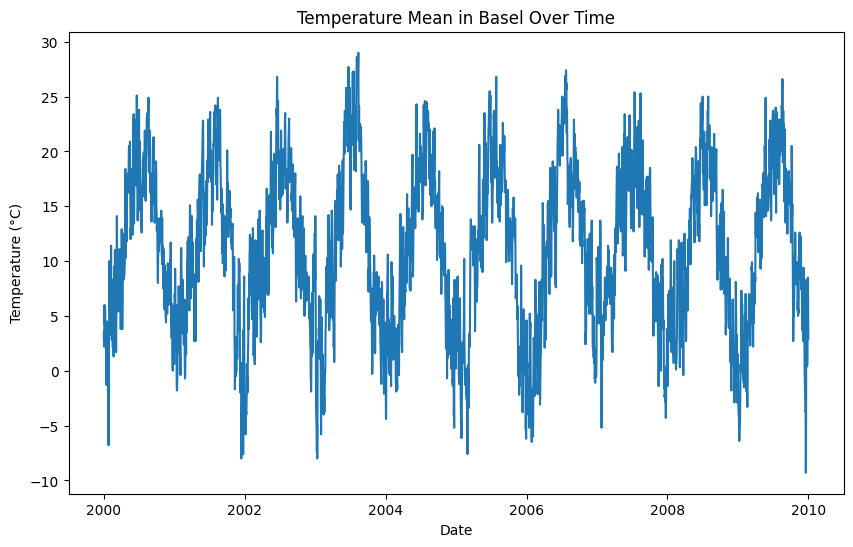

In [40]:
plt.figure(figsize=(10, 6))
plt.plot(df['DATE'], df['BASEL_temp_mean'])
plt.title('Temperature Mean in Basel Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.show()

Since the data is too big in terms of columns. So, let's take only

In [74]:
# selected_features = ['Month', 'Year', 'BASEL_temp_mean', 'BASEL_humidity', 'BASEL_pressure', 'BASEL_precipitation', 'BASEL_global_radiation', 'BASEL_cloud_cover', 'BASEL_sunshine']
# df_selected = df[selected_features]
# df_selected
selected_features = ['Month', 'BASEL_temp_mean', 'BASEL_humidity', 'BASEL_pressure', 'BASEL_precipitation', 'BASEL_global_radiation', 'BASEL_cloud_cover', 'BASEL_sunshine']
df_selected = df[selected_features]
df_selected

,Month,BASEL_temp_mean,BASEL_humidity,BASEL_pressure,BASEL_precipitation,BASEL_global_radiation,BASEL_cloud_cover,BASEL_sunshine
0,1,2.9,0.89,1.0286,0.03,0.20,8,0.0
1,1,3.6,0.87,1.0318,0.00,0.25,8,0.0
2,1,2.2,0.81,1.0314,0.00,0.50,5,3.7
3,1,3.9,0.79,1.0262,0.35,0.63,7,6.9
4,1,6.0,0.90,1.0246,0.07,0.51,5,3.7
...,...,...,...,...,...,...,...,...
3649,12,3.2,0.82,1.0084,0.42,0.28,7,0.3
3650,12,4.5,0.92,1.0028,1.68,0.22,7,0.2
3651,12,8.5,0.92,0.9979,1.54,0.07,8,0.0
3652,12,6.6,0.93,0.9958,0.57,0.17,7,0.1


In [75]:
df_selected.describe()

,Month,BASEL_temp_mean,BASEL_humidity,BASEL_pressure,BASEL_precipitation,BASEL_global_radiation,BASEL_cloud_cover,BASEL_sunshine
count,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000
mean,6.520799,11.022797,0.745107,1.017876,0.234849,1.330380,5.418446,4.661193
std,3.450083,7.414754,0.107788,0.007962,0.536267,0.935348,2.325497,4.330112
min,1.000000,-9.300000,0.380000,0.985600,0.000000,0.050000,0.000000,0.000000
25%,4.000000,5.300000,0.670000,1.013300,0.000000,0.530000,4.000000,0.500000
50%,7.000000,11.400000,0.760000,1.017700,0.000000,1.110000,6.000000,3.600000
75%,10.000000,16.900000,0.830000,1.022700,0.210000,2.060000,7.000000,8.000000
max,12.000000,29.000000,0.980000,1.040800,7.570000,3.550000,8.000000,15.300000


In [76]:
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3654 entries, 0 to 3653
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Month                   3654 non-null   int32  
 1   BASEL_temp_mean         3654 non-null   float64
 2   BASEL_humidity          3654 non-null   float64
 3   BASEL_pressure          3654 non-null   float64
 4   BASEL_precipitation     3654 non-null   float64
 5   BASEL_global_radiation  3654 non-null   float64
 6   BASEL_cloud_cover       3654 non-null   int64  
 7   BASEL_sunshine          3654 non-null   float64
dtypes: float64(6), int32(1), int64(1)
memory usage: 214.2 KB


In [77]:
df_selected.isnull().sum()

,0
Month,0
BASEL_temp_mean,0
BASEL_humidity,0
BASEL_pressure,0
BASEL_precipitation,0
BASEL_global_radiation,0
BASEL_cloud_cover,0
BASEL_sunshine,0


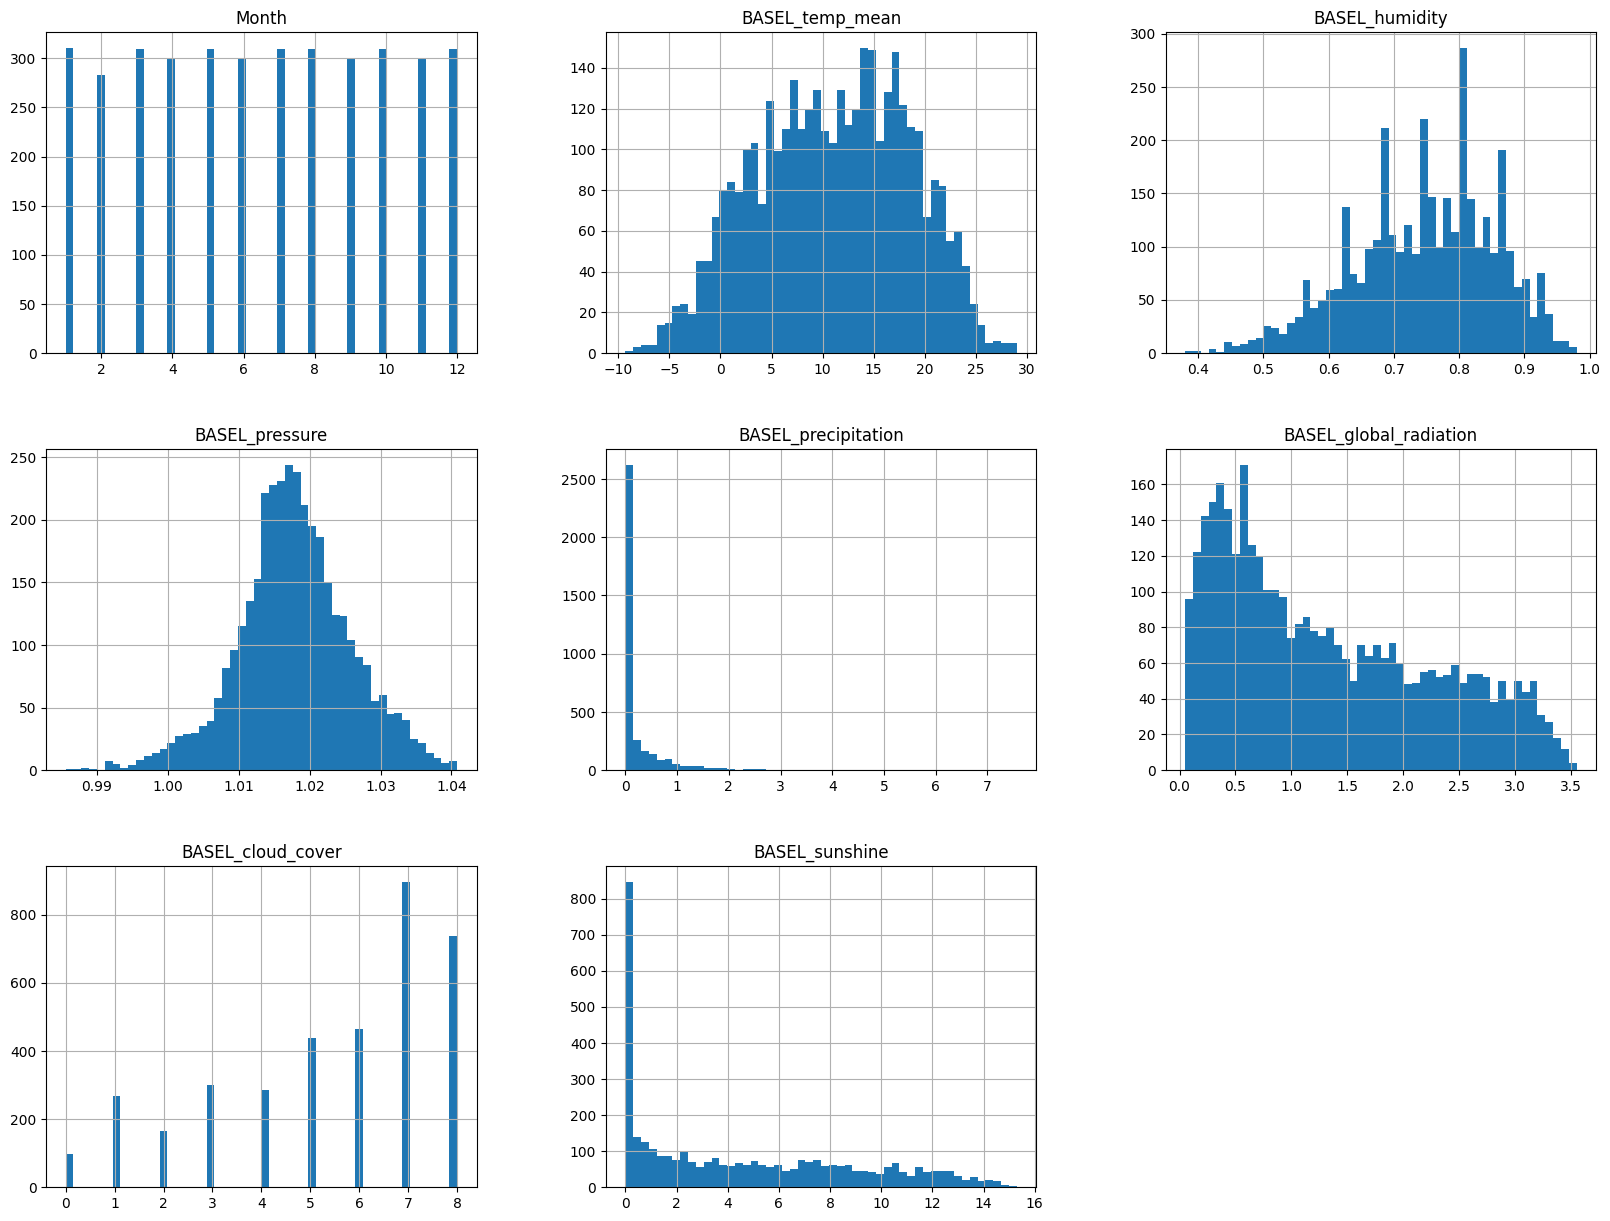

In [78]:
df_selected.hist(bins=50, figsize=(20, 15))
plt.show()

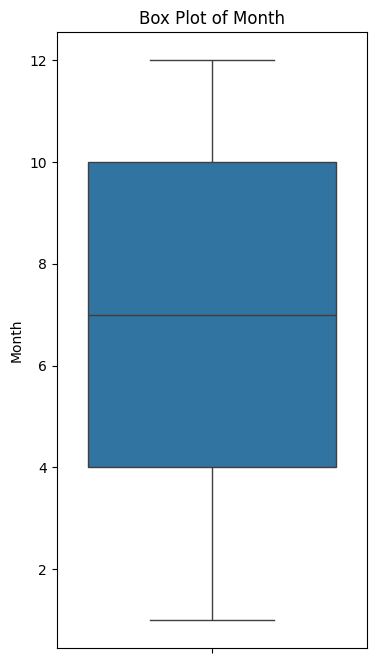

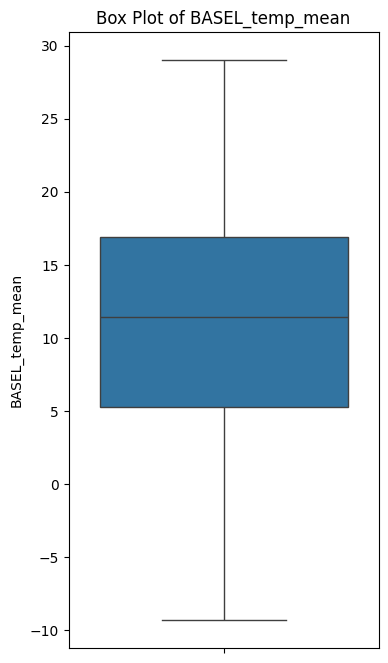

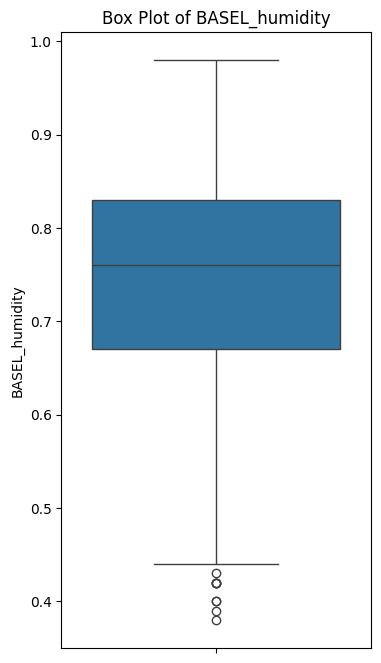

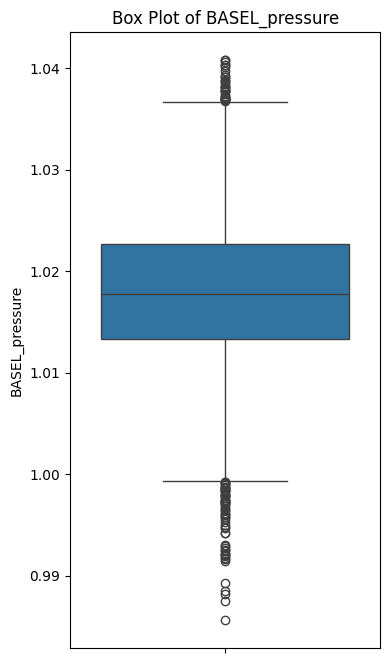

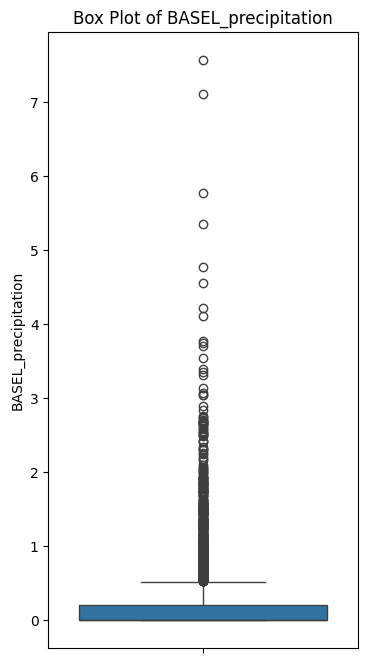

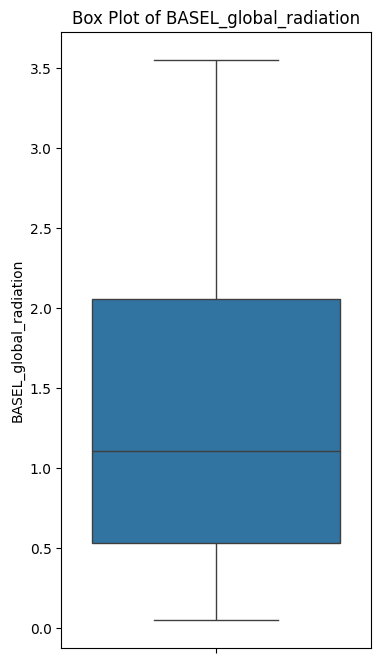

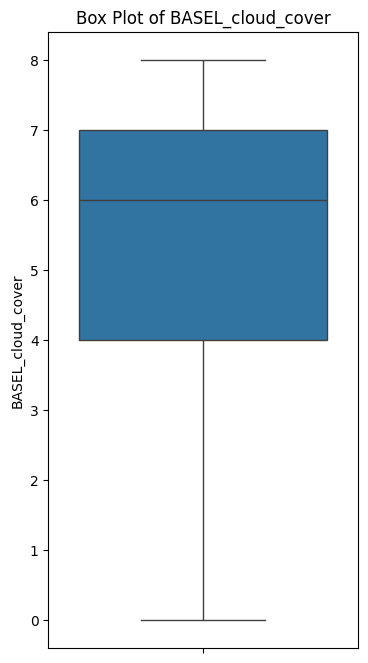

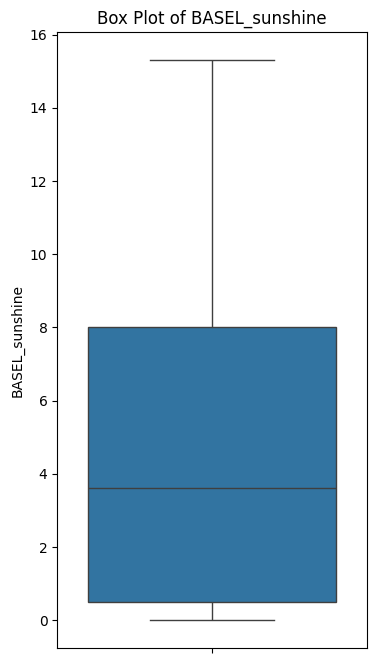

In [79]:
for column in df_selected.columns:
    plt.figure(figsize=(4, 8))
    sns.boxplot(y=df_selected[column])
    plt.title(f'Box Plot of {column}')
    plt.show()

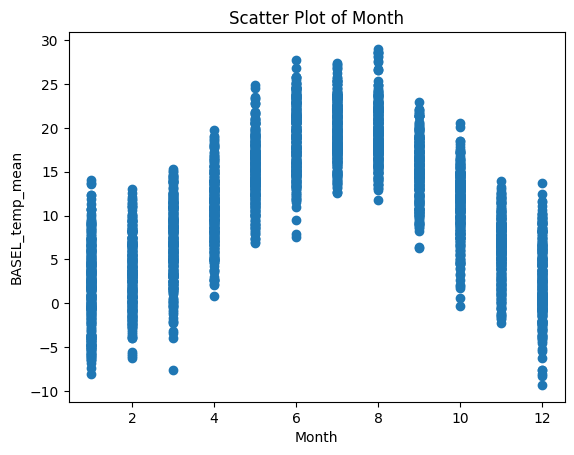

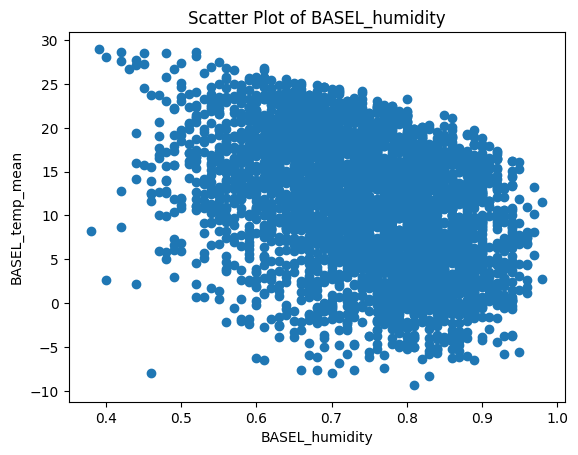

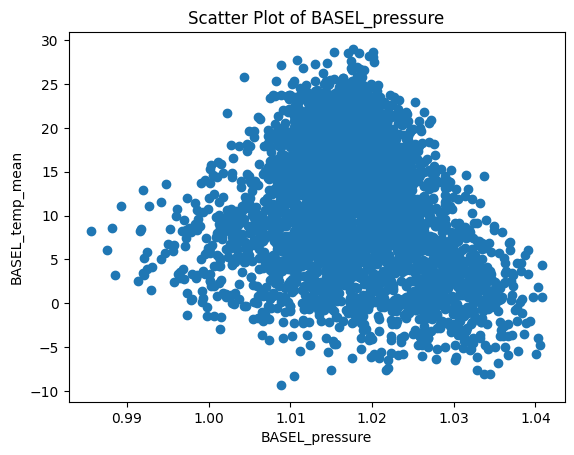

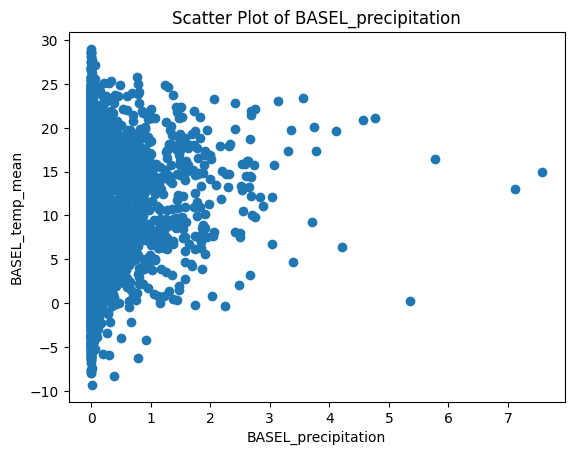

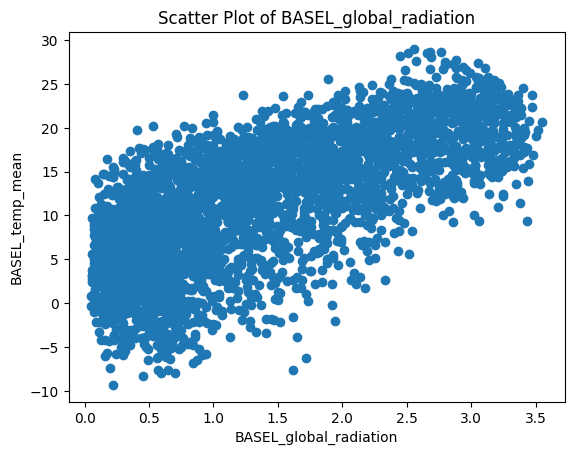

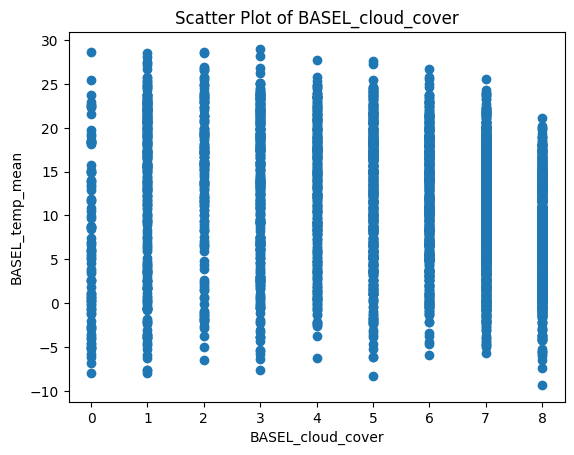

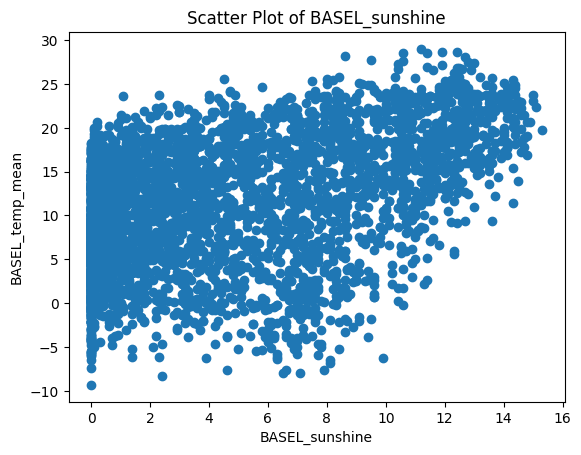

In [80]:
for column in df_selected.columns:
  if column != 'BASEL_temp_mean':
    plt.figure()
    plt.scatter(df_selected[column], df_selected['BASEL_temp_mean'])
    plt.title(f'Scatter Plot of {column}')
    plt.xlabel(column)
    plt.ylabel('BASEL_temp_mean')
    plt.show()


Correlation in heatmap:

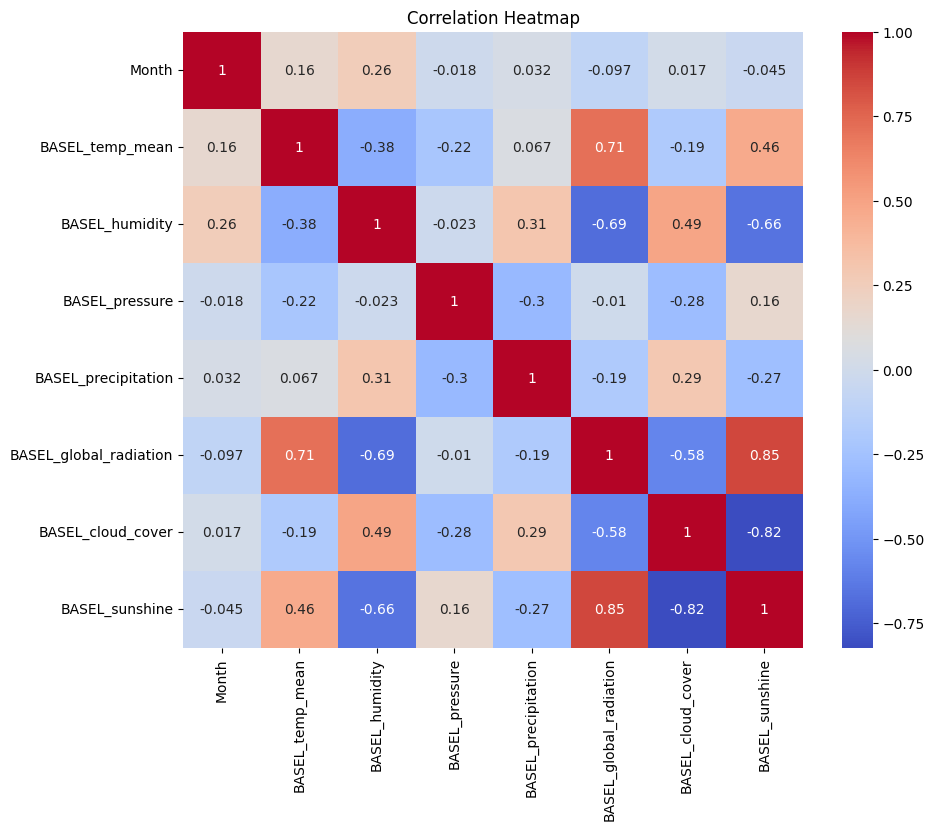

In [81]:
corr = df_selected.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [82]:
data = df_selected.copy()
X = data.drop('BASEL_temp_mean', axis=1)
y = data['BASEL_temp_mean']
print(X.shape)
print(y.shape)


(3654, 7)
(3654,)


In [83]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2923, 7)
(731, 7)
(2923,)
(731,)


In [84]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 17.979236588483587
R-squared: 0.6667737370794037


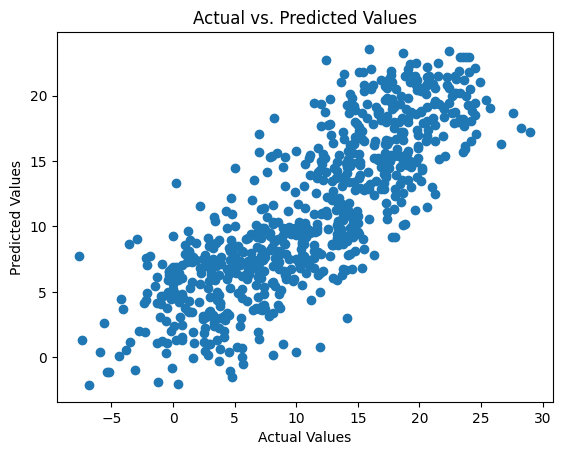

In [85]:
# Visualize predicted vs. actual values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()

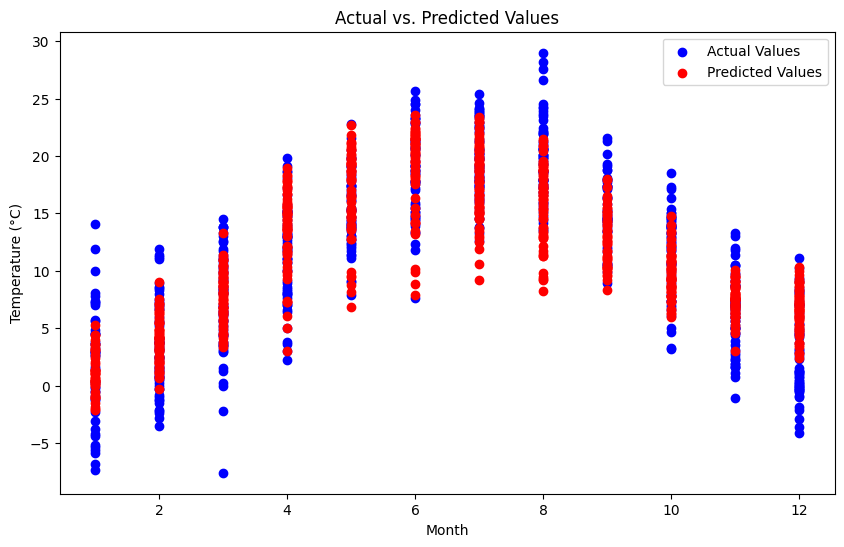

In [88]:
plt.figure(figsize=(10, 6))
plt.scatter(X_test['Month'], y_test, label='Actual Values', color='blue')
plt.scatter(X_test['Month'], y_pred, label='Predicted Values', color='red')
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.show()

Now, let's see which feature is most import for the model to predict the temperature.

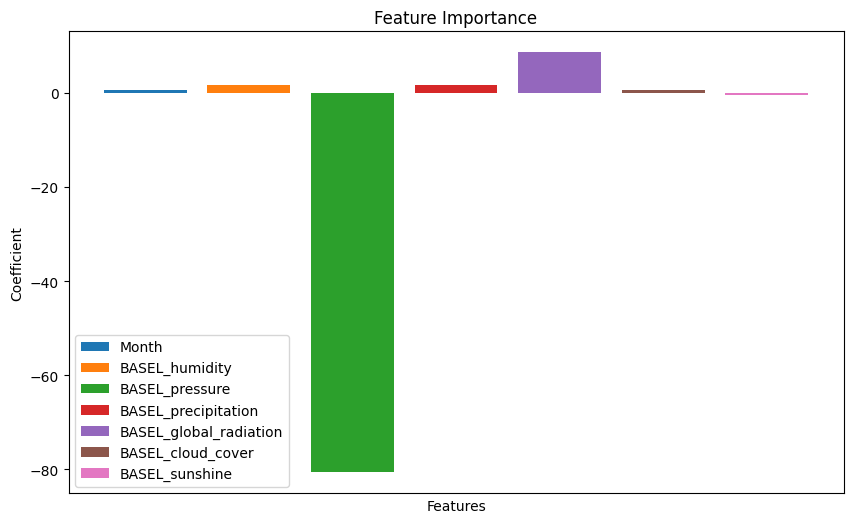

In [95]:
plt.figure(figsize=(10, 6))

# Create bars with labels for the legend
for i, col in enumerate(X_train.columns):
    plt.bar(i, model.coef_[i], label=col)

plt.xlabel('Features')
plt.ylabel('Coefficient')
plt.title('Feature Importance')

# Remove x-axis tick labels
plt.xticks([])

# Show the legend
plt.legend()
plt.show()

The limitation of this analysis is that this, despite it's good prediction accuracy, doesn't show the temperature at what year unless some additional work is done.

# References:


*   [https://github.com/dilumsadeepa/weather-predictor-python](https://github.com/dilumsadeepa/weather-predictor-python)

